In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_predict, KFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
import sklearn.tree as tree

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Collab DataSets/mushrooms.csv")
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [3]:
df.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [4]:
for i in df.columns:
  print(f"{i}-> \t {df[i].unique()}")

class-> 	 ['p' 'e']
cap-shape-> 	 ['x' 'b' 's' 'f' 'k' 'c']
cap-surface-> 	 ['s' 'y' 'f' 'g']
cap-color-> 	 ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises-> 	 ['t' 'f']
odor-> 	 ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment-> 	 ['f' 'a']
gill-spacing-> 	 ['c' 'w']
gill-size-> 	 ['n' 'b']
gill-color-> 	 ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape-> 	 ['e' 't']
stalk-root-> 	 ['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring-> 	 ['s' 'f' 'k' 'y']
stalk-surface-below-ring-> 	 ['s' 'f' 'y' 'k']
stalk-color-above-ring-> 	 ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring-> 	 ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type-> 	 ['p']
veil-color-> 	 ['w' 'n' 'o' 'y']
ring-number-> 	 ['o' 't' 'n']
ring-type-> 	 ['p' 'e' 'l' 'f' 'n']
spore-print-color-> 	 ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population-> 	 ['s' 'n' 'a' 'v' 'y' 'c']
habitat-> 	 ['u' 'g' 'm' 'd' 'p' 'w' 'l']


In [5]:
cap_colors = df["cap-color"].value_counts()
cap_colors

n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: cap-color, dtype: int64

In [6]:
cap_colors_height = cap_colors.values.tolist()
cap_colors_height

[2284, 1840, 1500, 1072, 1040, 168, 144, 44, 16, 16]

In [7]:
cap_colors.axes[0]

Index(['n', 'g', 'e', 'y', 'w', 'b', 'p', 'c', 'u', 'r'], dtype='object')

In [8]:
cap_colors_labels = cap_colors.axes[0].to_list()
cap_colors_labels

['n', 'g', 'e', 'y', 'w', 'b', 'p', 'c', 'u', 'r']

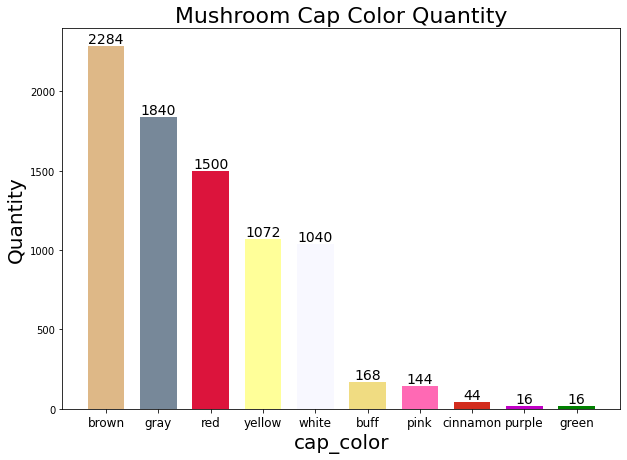

In [9]:
ind = np.arange(10)
width = 0.7
colors = ['#DEB887','#778899','#DC143C','#FFFF99','#f8f8ff','#F0DC82','#FF69B4','#D22D1E','#C000C5','g']

fig, ax = plt.subplots(figsize=(10,7))
mushroom_bars = ax.bar(ind, cap_colors_height, width, color=colors)

ax.set_xlabel("cap_color", fontsize=20)
ax.set_ylabel("Quantity", fontsize=20)
ax.set_title("Mushroom Cap Color Quantity", fontsize = 22)

ax.set_xticks(ind)
ax.set_xticklabels(('brown', 'gray','red','yellow','white','buff','pink','cinnamon','purple','green'),fontsize = 12)

def autolabel(bars, fontsize = 14):

  for bar in bars:
    height = bar.get_height()
    # ax.text(bar.get_x() + bar.get_width()/2., 1*height,'%d', %int(height), ha="centre", va="bottom", fontsize=fontsize)
    ax.text(bar.get_x() + bar.get_width()/2., 1*height,'%d' % int(height),ha='center', va='bottom',fontsize=fontsize)

autolabel(mushroom_bars)

In [10]:
poisonous_cc = []
edible_cc = []

for capColor in cap_colors_labels:
  total = len(df[df["cap-color"] == capColor])
  edible = len(df[(df["cap-color"] == capColor) & (df["class"] == "e")])
  edible_cc.append(edible)
  poisonous_cc.append(total-edible)

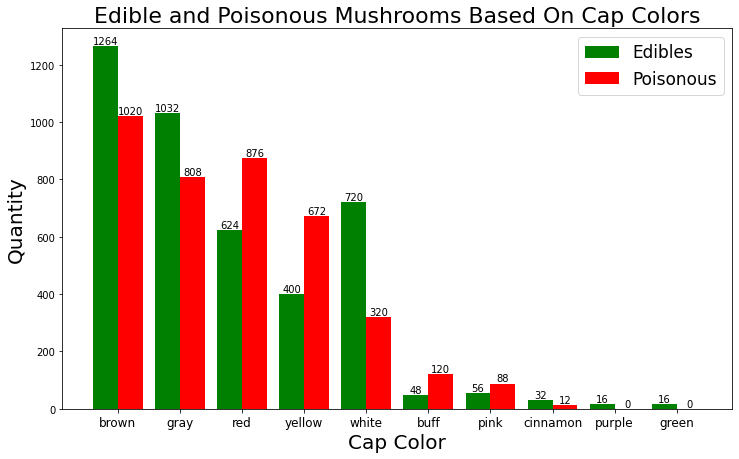

In [11]:
width = 0.40
fig, ax = plt.subplots(figsize=(12,7))

edible_bars = ax.bar(ind, edible_cc, width, color="g")
poisonous_bars = ax.bar(ind+width, poisonous_cc, width, color="r")

ax.set_xlabel("Cap Color", fontsize=20)
ax.set_ylabel("Quantity", fontsize=20)
ax.set_title("Edible and Poisonous Mushrooms Based On Cap Colors", fontsize=22)

ax.set_xticks(ind+width/2)
ax.set_xticklabels(("brown", "gray", "red", "yellow", "white", "buff", "pink", "cinnamon", "purple", "green"), fontsize=12)

ax.legend((edible_bars, poisonous_bars), ("Edibles", "Poisonous"), fontsize= 17)

autolabel(edible_bars, 10)
autolabel(poisonous_bars,10)

In [12]:
labelencoder = LabelEncoder()
for column in df.columns:
  df[column] = labelencoder.fit_transform(df[column])

df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,0,0,2,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,0,0,2,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,0,0,2,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,1,0,2,1,7,7,0,2,1,0,7,4,2


In [13]:
df.groupby("class").size()

class
0    4208
1    3916
dtype: int64

In [14]:
x = df.drop("class", axis = 1)
y = df[["class"]]

In [15]:
ss_x = StandardScaler()
x = ss_x.fit_transform(x)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2830f87410>,
      dtype=object)

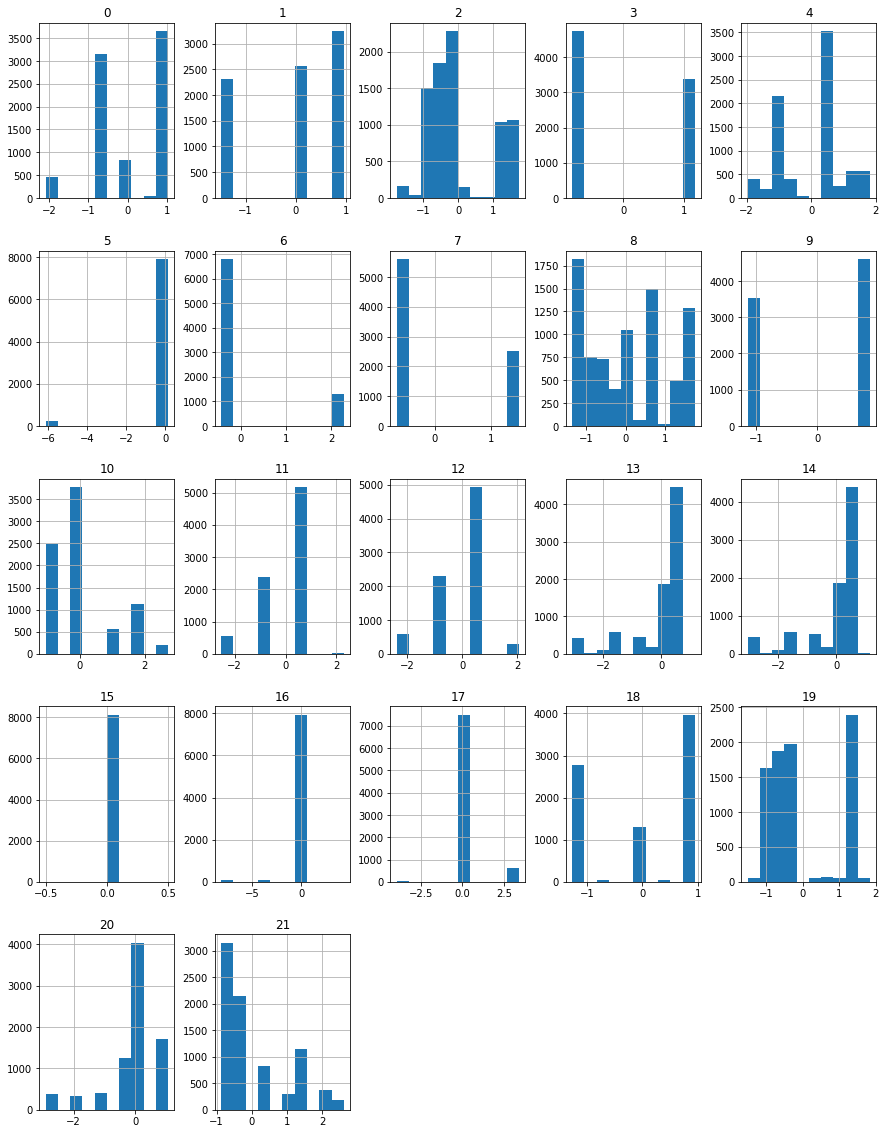

In [16]:
fig = plt.figure(figsize=(15,20))

axis = fig.gca()
pd.DataFrame(x).hist(ax=axis)

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state= 1)

In [ ]:
param_grid = {
    "max_depth" : [1,5,10,15],
    "n_estimators" : [10,100,500,1000],
    "min_samples_leaf" : [1,2,3,4,5,10,15,20,30,40,50]
}
grid_search = GridSearchCV(estimator = RandomForestClassifier(n_jobs = -1,max_features = "sqrt"), param_grid = param_grid, cv = 10)

grid_search.fit(x_train, y_train)

print(grid_search.best_params)

optimal_estimator = grid_search.best_params.get("n_estimators")
optimal_depth = grid_search.best_params.get("max_depth")
optimal_leaf = grid_search.best_params.get("min_samples_leaf")

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

AttributeError: ignored

In [ ]:
model = RandomForestClassifier(n_estimators = 100, max_depth = 10 , min_samples_leaf= 1) #Passing the hardcode values because grid search takes too much time to run
model.fit(x_train, y_train)

k_fold = KFold(n_splits = 10, random_state=123)
predictions = cross_val_predict(model, x_test, y_test, cv=k_fold)

In [ ]:
print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))

In [ ]:
plt.figure(figsize=(15,10))
tree.plot_tree(model.estimators_[0], filled= True)